<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_13_fundamentals_of_neural_networks_MNIST/fundamentals_of_neural_networks_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from sklearn.metrics import accuracy_score


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train, X_test = X_train.reshape(-1, 28*28).astype('float32') / 255.0, X_test.reshape(-1, 28*28).astype('float32') / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [7]:
# Basic Model
basic_model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')
])
basic_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
basic_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
basic_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = basic_model.evaluate(X_test, y_test, verbose=0)
print(f"Basic Model Accuracy: {test_acc:.4f}")

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9289 - loss: 0.2380 - val_accuracy: 0.9607 - val_loss: 0.1309
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1136 - val_accuracy: 0.9728 - val_loss: 0.0874
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9786 - loss: 0.0703 - val_accuracy: 0.9714 - val_loss: 0.0922
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9829 - loss: 0.0558 - val_accuracy: 0.9754 - val_loss: 0.0812
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9750 - val_loss: 0.0841
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9907 - loss: 0.0308 - val_accuracy: 0.9765 - val_loss: 0.0797
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.9768 - val_loss: 0.0804
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9940 - loss: 0.0201 -

In [14]:
# Intermediate Model
intermediate_model = Sequential([
    Dense(256, activation='relu', input_shape=(28*28,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
intermediate_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
intermediate_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
intermediate_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = intermediate_model.evaluate(X_test, y_test, verbose=0)
print(f"Intermediate Model Accuracy: {test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8822 - loss: 0.3876 - val_accuracy: 0.9668 - val_loss: 0.1046
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9708 - loss: 0.0938 - val_accuracy: 0.9679 - val_loss: 0.1051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9809 - loss: 0.0622 - val_accuracy: 0.9732 - val_loss: 0.0844
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9844 - loss: 0.0506 - val_accuracy: 0.9743 - val_loss: 0.0899
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9876 - loss: 0.0388 - val_accuracy: 0.9779 - val_loss: 0.0797
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9810 - val_loss: 0.0744
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.9812 - val_loss: 0.0652
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9938 - loss: 0

In [16]:
# Advanced Model
advanced_model = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
advanced_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [17]:
advanced_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
advanced_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = advanced_model.evaluate(X_test, y_test, verbose=0)
print(f"Advanced Model Accuracy: {test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 14ms/step - accuracy: 0.8371 - loss: 0.5278 - val_accuracy: 0.9648 - val_loss: 0.1125
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9381 - loss: 0.1992 - val_accuracy: 0.9716 - val_loss: 0.0918
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.9519 - loss: 0.1565 - val_accuracy: 0.9722 - val_loss: 0.0862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9580 - loss: 0.1369 - val_accuracy: 0.9771 - val_loss: 0.0752
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9629 - loss: 0.1256 - val_accuracy: 0.9788 - val_loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9640 - loss: 0.1122 - val_accuracy: 0.9792 - val_loss: 0.0681
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9679 - loss: 0.1032 - val_accuracy: 0.9821 - val_loss: 0.0610
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9708 -

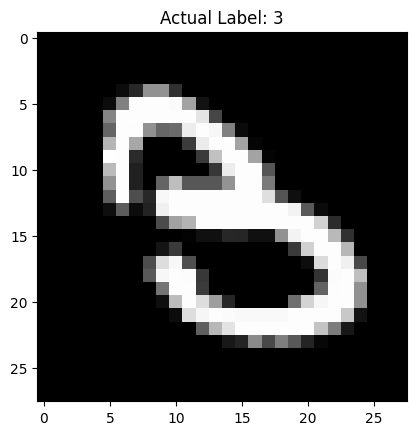

In [51]:
image_index = 18
plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')  # Display the image
plt.title("Actual Label: " + str(np.argmax(y_test[image_index])))  # Show actual label
plt.show()

# Reshape the image for model input (1 sample of 784 features)
image_reshaped = X_test[image_index].reshape(1, 28*28)

In [52]:
# Make a prediction using the trained Basic model
prediction = basic_model.predict(image_reshaped)

# Get the predicted class (digit with the highest probability)
predicted_label = np.argmax(prediction)

print(f"Predicted Digit from Basic Model: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Digit from Basic Model: 8


In [53]:
# Make a prediction using the trained Intermediate model
prediction = intermediate_model.predict(image_reshaped)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit from Intermediate Model: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Digit from Intermediate Model: 3


In [54]:
# Make a prediction using the trained Advanced model
prediction = advanced_model.predict(image_reshaped)
predicted_label = np.argmax(prediction)
print(f"Predicted Digit from Advanced Model: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Digit from Advanced Model: 3


Basic Model (20 Epochs, Accuracy: 97.74%, training time 7-17s per epoch)
- Fast convergence but mild overfitting.
- Misclassified the digit (8 instead of 3), showing limitations in distinguishing certain cases.

Intermediate Model (10 Epochs, Accuracy: 97.78%, training time 12-21s per epoch)
- Slight improvement over the basic model but with some validation loss fluctuations.
- Correctly predicted the digit (3).

Advanced Model (10 Epochs, Accuracy: 98.17%, training time 26-77s per epoch)
- Best generalization, steady validation loss reduction.
- Training takes more time
- Correctly predicted the digit (3), proving superior accuracy.